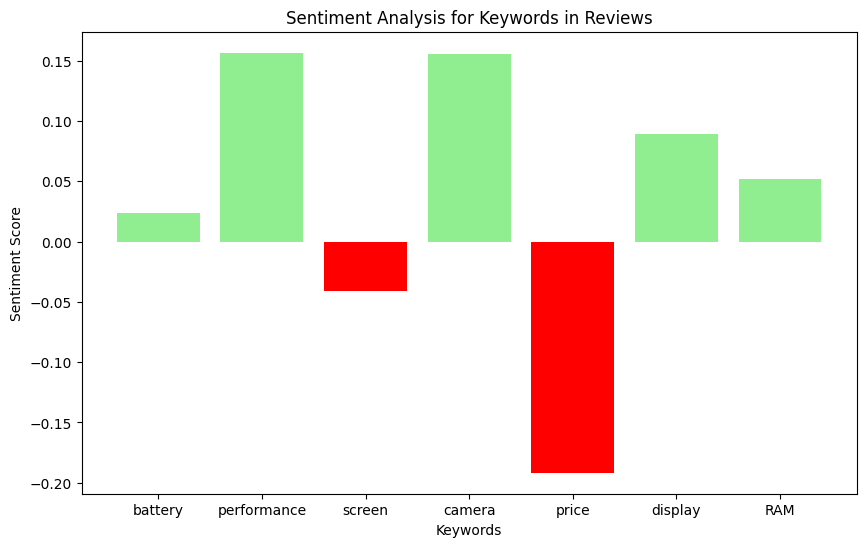

Sentiment for Keywords: {'battery': 0.023843371944737495, 'performance': 0.15656565656565657, 'screen': -0.04119176963714779, 'camera': 0.15558540587952352, 'price': -0.19166666666666665, 'display': 0.08941262883219667, 'RAM': 0.052250403366474796}


In [2]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import spacy
import matplotlib.pyplot as plt

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to scrape website text
def scrape_website_text(url):
    """
    Fetch HTML content from the given URL, parse it with BeautifulSoup,
    then return the combined text from all <p> tags.
    """
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error if status code != 200
    except requests.exceptions.RequestException as e:
        print(f"Error fetching {url}: {e}")
        return ""

    soup = BeautifulSoup(response.text, "html.parser")

    # Extract text from all <p> tags
    paragraphs = soup.find_all("p")
    text_content = " ".join([p.get_text(strip=True) for p in paragraphs])

    return text_content

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    """
    Perform sentiment analysis on the text.
    Returns a float value indicating sentiment polarity.
    """
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Function to extract noun phrases using spaCy
def extract_noun_phrases(text):
    """
    Extract noun phrases from the text using spaCy.
    Returns a list of noun phrases.
    """
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

# Function to analyze specific keywords and perform sentiment analysis
def analyze_keywords_with_sentiment(text, keywords):
    """
    Analyze keywords in the text and perform sentiment analysis on sentences containing those keywords.
    Returns a dictionary of keywords and their corresponding sentiment.
    """
    keyword_sentiment = {}

    # Extract sentences
    sentences = text.split('. ')

    for keyword in keywords:
        keyword_sentences = [sentence for sentence in sentences if keyword.lower() in sentence.lower()]
        if keyword_sentences:
            sentiment_values = [analyze_sentiment(sentence) for sentence in keyword_sentences]
            avg_sentiment = sum(sentiment_values) / len(sentiment_values) if sentiment_values else 0
            keyword_sentiment[keyword] = avg_sentiment

    return keyword_sentiment

# Function to visualize sentiment of keywords using a bar chart
def visualize_sentiment(keyword_sentiment):
    """
    Visualize the sentiment analysis results using a bar chart.
    """
    keywords = list(keyword_sentiment.keys())
    sentiments = list(keyword_sentiment.values())

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(keywords, sentiments, color=['lightgreen' if sentiment > 0 else 'red' for sentiment in sentiments])
    plt.xlabel('Keywords')
    plt.ylabel('Sentiment Score')
    plt.title('Sentiment Analysis for Keywords in Reviews')
    plt.show()

# Main function to execute the scraping, analysis, and visualization
def scrape_and_analyze(url, keywords):
    """
    Orchestrates scraping the URL and performing sentiment analysis on specific keywords.
    Visualizes the sentiment analysis results.
    """
    # Step 1: Scrape text
    raw_text = scrape_website_text(url)
    if not raw_text:
        return None

    # Step 2: Perform NLP (extract noun phrases)
    noun_phrases = extract_noun_phrases(raw_text)

    # Step 3: Perform sentiment analysis for specified keywords
    keyword_sentiment = analyze_keywords_with_sentiment(raw_text, keywords)

    # Step 4: Visualize the sentiment for the keywords
    visualize_sentiment(keyword_sentiment)

    return {
        "url": url,
        "raw_text": raw_text,
        "noun_phrases": noun_phrases,
        "keyword_sentiment": keyword_sentiment
    }

# Example usage
url = "https://en.wikipedia.org/wiki/MacBook_Pro"  # Replace with your target URL
keywords = ["battery", "performance", "screen", "camera", "price" , "display", "weight" , "RAM"]  # List of keywords to analyze

result = scrape_and_analyze(url, keywords)

# Print the result (optional)
if result:
    print("Sentiment for Keywords:", result["keyword_sentiment"])


